# How to visualize optimizer histories

Estimagic's `criterion_plot` can visualize the history of function values for one or multiple optimizations. 
Estimagic's `params_plot` can visualize the history of parameter values for one optimization. 

This can help you to understand whether your optimization actually converged and if not, which parameters are problematic. 

It can also help you to find the fastest optimizer for a given optimization problem. 

In [1]:
import numpy as np

import estimagic as em

## Run two optimization to get example results

In [2]:
def sphere(x):
    return x @ x


results = {}
for algo in ["scipy_lbfgsb", "scipy_neldermead"]:
    results[algo] = em.minimize(sphere, params=np.arange(5), algorithm=algo)

## Make a single criterion plot

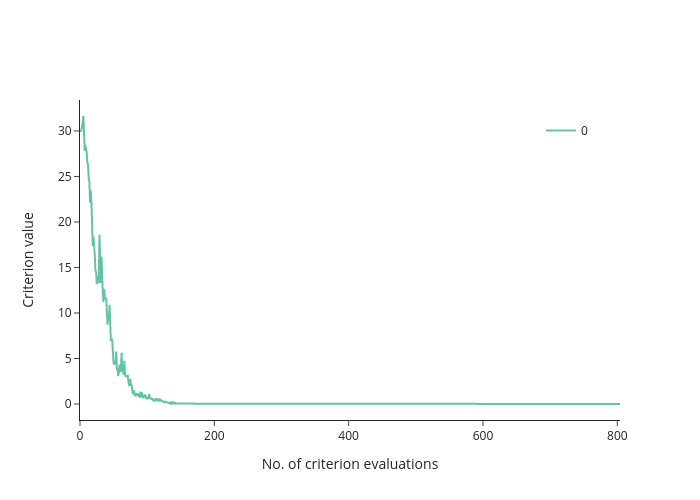

In [3]:
fig = em.criterion_plot(results["scipy_neldermead"])
fig.show(renderer="png")

## Compare two optimizations in a criterion plot

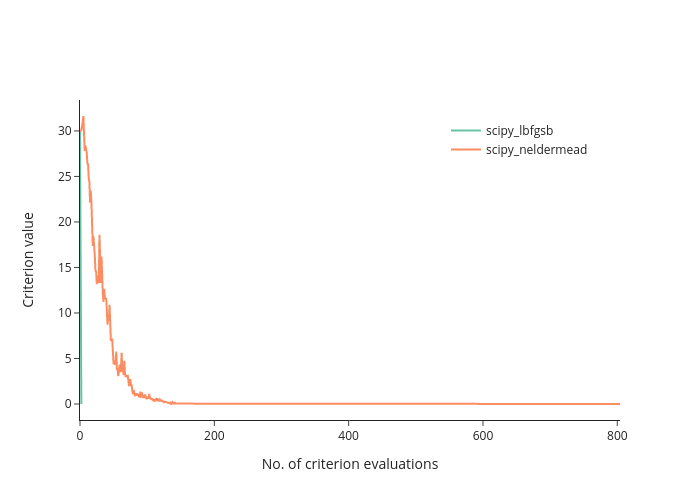

In [4]:
fig = em.criterion_plot(results)
fig.show(renderer="png")

## Use some advanced options of criterion_plot

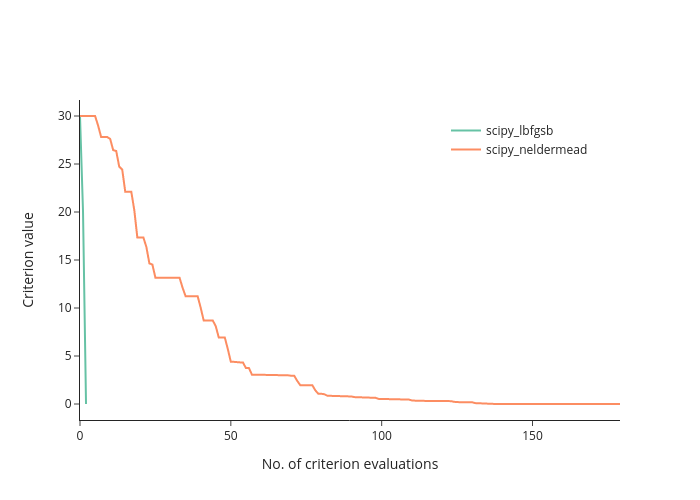

In [5]:
fig = em.criterion_plot(
    results,
    # cut off after 180 evaluations
    max_evaluations=180,
    # show only the current best function value
    monotone=True,
)
fig.show(renderer="png")

## Make a params plot

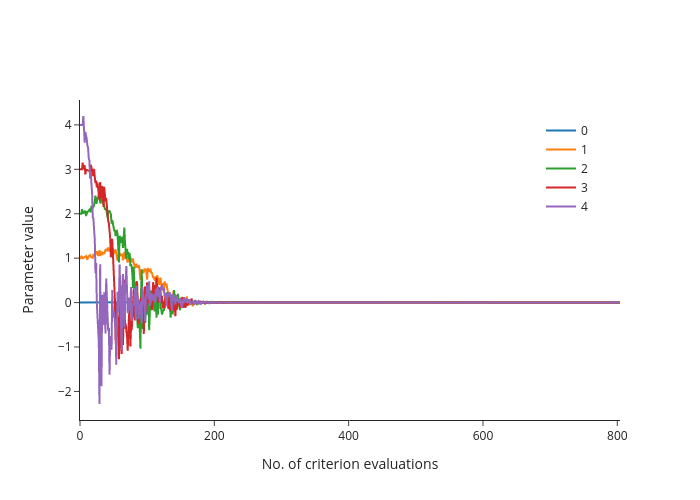

In [6]:
fig = em.params_plot(results["scipy_neldermead"])
fig.show(renderer="png")

## Use advanced options of params plot

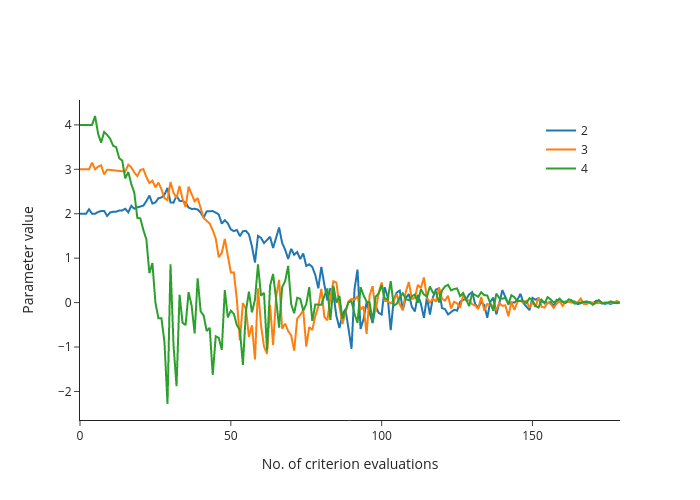

In [7]:
fig = em.params_plot(
    results["scipy_neldermead"],
    # cut off after 180 evaluations
    max_evaluations=180,
    # select only the last three parameters
    selector=lambda x: x[2:],
)
fig.show(renderer="png")

## criterion_plot with multistart optimization

In [8]:
def alpine(x):
    return np.sum(np.abs(x * np.sin(x) + 0.1 * x))


res = em.minimize(
    sphere,
    params=np.arange(10),
    soft_lower_bounds=np.full(10, -3),
    soft_upper_bounds=np.full(10, 10),
    algorithm="scipy_neldermead",
    multistart=True,
    multistart_options={"n_samples": 1000, "convergence.max_discoveries": 10},
)

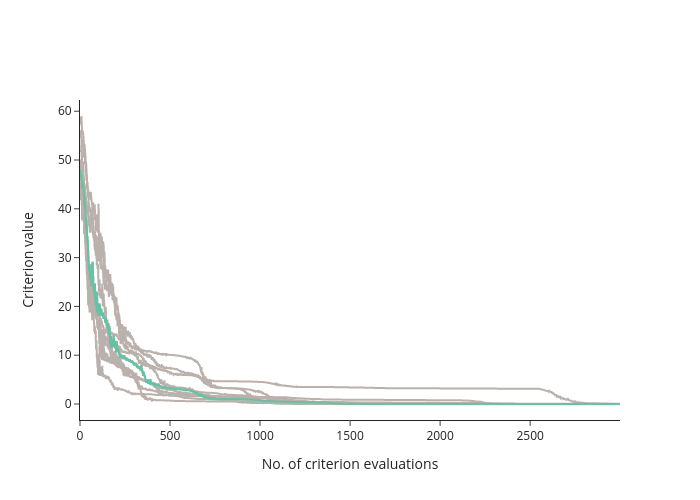

In [9]:
fig = em.criterion_plot(res, max_evaluations=3000)
fig.show(renderer="png")